In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('../final/o-khan-academy-kids.csv')

In [8]:
df

,date,developerResponse,review,rating,isEdited,userName,title,Name,IOS
0,2023-01-27 09:48:46,"{'id': 34575065, 'body': 'We sincerely appreci...",Kahn Academy Kids is the best educational kids...,5,False,Triciaroseyrose,Wow! Just what my kids needed!,khan-academy-kids,1
1,2021-01-01 16:18:30,"{'id': 20176204, 'body': ""It's exciting to hea...",My daughter(age 7) used Khan Academy in school...,5,False,keeperofthecookies,A+ app for kids!,khan-academy-kids,1
2,2024-01-30 17:53:10,"{'id': 41714643, 'body': ""It's so exciting to ...",I have used this app for years with all 3 of m...,5,False,Zin468,The Absolute Best,khan-academy-kids,1
3,2024-07-23 02:36:02,"{'id': 45577529, 'body': ""We're so pleased you...",I don’t even know where to start! I am so impr...,5,False,tinabeanababy,Absolutely blown away! They are partnered with...,khan-academy-kids,1
4,2020-09-10 21:56:42,"{'id': 17878584, 'body': 'Our design team will...",My 4-year-old has been cruising through severa...,5,False,CrocoPhile,Very well-designed for actual learning,khan-academy-kids,1
...,...,...,...,...,...,...,...,...,...
787,2021-03-08 22:37:36,NaN,"Finally, an educational app for kids with no i...",5,False,RLchickiedee,What We’ve Been Waiting For,khan-academy-kids,1
788,2021-01-17 01:27:30,NaN,A wonderful learning app that keeps my kids en...,5,False,ELDD0516,Shocked that this app is free!,khan-academy-kids,1
789,2020-11-09 21:38:01,NaN,This is a handy app to use when the grandchild...,5,False,Keepthemlearning!,Grams tool for bored grandchildren,khan-academy-kids,1
790,2020-11-03 00:49:06,NaN,My 3 year old recently started remote pre-k3. ...,5,False,BillCraven,Great for learning,khan-academy-kids,1


In [6]:
from transformers import pipeline
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

In [9]:
def analyze_app_emotions(reviews, app_name):
    emotions_df = pd.DataFrame()
    skipped_count = 0
    
    for review in reviews:
        try:
            # Get emotions for current review
            emotions = classifier(review)
            
            # Create dictionary mapping labels to scores
            row_data = {'review': review, 'Name': app_name}
            for emotion in emotions[0]:
                row_data[emotion['label']] = emotion['score']
                
            # Convert to DataFrame row and concatenate
            review_df = pd.DataFrame([row_data])
            emotions_df = pd.concat([emotions_df, review_df], ignore_index=True)
            
        except RuntimeError as e:
            skipped_count += 1
            continue
    
    return emotions_df

In [10]:
emotion_df = analyze_app_emotions(df['review'], df['Name'].iloc[0])

In [11]:
emotion_df

,review,Name,admiration,love,joy,approval,excitement,neutral,pride,optimism,...,disappointment,surprise,anger,sadness,disgust,fear,nervousness,grief,embarrassment,remorse
0,Kahn Academy Kids is the best educational kids...,khan-academy-kids,0.702312,0.350449,0.344719,0.176597,0.047040,0.026193,0.010894,0.008979,...,0.001996,0.001799,0.001510,0.001067,0.000646,0.000598,0.000587,0.000543,0.000458,0.000352
1,My daughter(age 7) used Khan Academy in school...,khan-academy-kids,0.421083,0.560641,0.132093,0.248096,0.022455,0.061822,0.005939,0.017328,...,0.002138,0.000999,0.001356,0.001347,0.000814,0.000440,0.000447,0.000481,0.000321,0.000590
2,I have used this app for years with all 3 of m...,khan-academy-kids,0.539233,0.050292,0.023329,0.138749,0.036195,0.015359,0.001836,0.007179,...,0.002645,0.009325,0.002276,0.002595,0.001178,0.001200,0.001136,0.001009,0.000866,0.001934
3,I don’t even know where to start! I am so impr...,khan-academy-kids,0.785940,0.471311,0.042533,0.083340,0.052906,0.011991,0.006513,0.006597,...,0.002953,0.026754,0.002523,0.001130,0.001094,0.001248,0.000631,0.000632,0.000676,0.000575
4,My 4-year-old has been cruising through severa...,khan-academy-kids,0.781550,0.004277,0.030742,0.242852,0.009454,0.074177,0.013212,0.228639,...,0.008822,0.001701,0.001232,0.000983,0.000918,0.000630,0.000376,0.000680,0.000385,0.000449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,"Finally, an educational app for kids with no i...",khan-academy-kids,0.012489,0.001646,0.010089,0.021326,0.004665,0.009418,0.000874,0.006391,...,0.001130,0.001111,0.001142,0.001579,0.000844,0.000578,0.000324,0.000425,0.000435,0.001031
788,A wonderful learning app that keeps my kids en...,khan-academy-kids,0.473879,0.520794,0.025125,0.025450,0.007978,0.002739,0.003249,0.009458,...,0.003426,0.002916,0.003731,0.004749,0.002267,0.001280,0.000646,0.001409,0.000923,0.003000
789,This is a handy app to use when the grandchild...,khan-academy-kids,0.024561,0.006502,0.818145,0.060863,0.029829,0.080451,0.002866,0.016298,...,0.001275,0.000677,0.001912,0.001727,0.000545,0.000548,0.001300,0.000539,0.000596,0.000577
790,My 3 year old recently started remote pre-k3. ...,khan-academy-kids,0.073057,0.320956,0.090303,0.190238,0.022354,0.423488,0.002904,0.004292,...,0.001667,0.001110,0.001370,0.001309,0.000695,0.000717,0.000510,0.000481,0.000347,0.000339


In [19]:
#functions
def create_emotion_spider(emotions_df, title_suffix, color, figsize):
    # Create buffer to store image
    from io import BytesIO
    import base64
    
    # Create figure and plot
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    # Calculate means and get top 6
    emotion_means = emotions_df.drop(['review', 'Name'], axis=1).mean()
    top_emotions = dict(sorted(emotion_means.items(), key=lambda x: x[1], reverse=True)[:6])
    
    # Prepare data
    emotions = [emotion.capitalize() for emotion in top_emotions.keys()]
    values = list(top_emotions.values())
    
    # Setup angles
    num_vars = len(emotions)
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]
    values += values[:1]
    
    # Plot data
    ax.plot(angles, values, 'o-', linewidth=2, color=color, label='Top 6 Emotions')
    ax.fill(angles, values, alpha=0.25, color=color)
    
    # Customize chart
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(emotions, size=10)
    ax.set_rgrids([0.1, 0.2, 0.3, 0.4, 0.5])
    
    plt.title(f"Emotional Analysis: {title_suffix}", size=15, y=1.05)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.tight_layout()
    
    # Save plot to buffer
    buffer = BytesIO()
    plt.savefig(buffer, format='png', bbox_inches='tight')
    buffer.seek(0)
    image_png = buffer.getvalue()
    graph = base64.b64encode(image_png).decode('utf-8')
    buffer.close()
    plt.show()
    # Clear the current figure
    plt.close()
    
    # Encode
    
    
    return graph

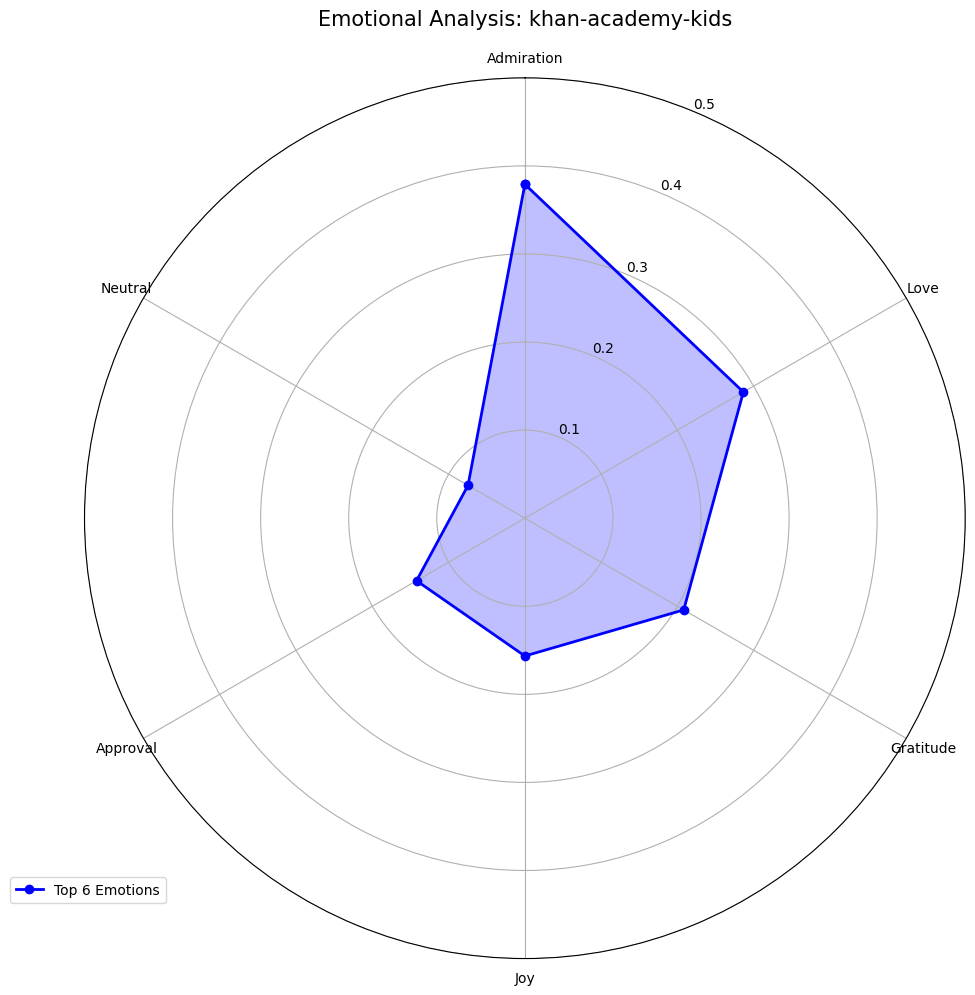

In [20]:
# Generate graph
img = create_emotion_spider(emotion_df, df['Name'].iloc[0], 'blue', (10, 10))

In [18]:
img

'iVBORw0KGgoAAAANSUhEUgAAA88AAAPjCAYAAACK5TyOAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/OQEPoAAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzdd1QU198G8GdZekc60gSxYKGIIiqC3aCxK7ZgiYnJG02xJzGarmnGqLHEnsRYY+8Ve0UFCyggSEdBUens7rx/7I9VAkoRGMrzOWePO7M7s99li/vMvXOvRBAEAURERERERET0UmpiF0BERERERERU0zE8ExEREREREZWC4ZmIiIiIiIioFAzPRERERERERKVgeCYiIiIiIiIqBcMzERERERERUSkYnomIiIiIiIhKwfBMREREREREVAqGZyIiIiIiIqJSMDwTUb0lkUhKvYwdO1bsMsvN398fEokEsbGxYpdSJsHBwa/1t87Ly4OJiQkkEgm6du1aucVV0NixYyGRSBAcHFxtj/nll19CIpFg3bp11faYQPlfv9d9vansYmNjIZFI4O/vL3YpVc7R0RESiaTM96/I9+S6desgkUjw5Zdflr9AIqoT1MUugIhIbGPGjHnpbZ06darGSspGIpHAwcGh1oTjqrZ3715kZGQAAE6ePImEhATY2tqKWxQRERHVOQzPRFTvVXdLXVX7888/kZ2djYYNG4pdSrX466+/AADW1tZITk7Ghg0bMHPmTJGrqn6TJk3C8OHDYW1tLXYpRDVeffueJKLKwW7bRER1jL29PZo1awYNDQ2xS6lyjx49wv79+6Gjo4OVK1cCeB6m6xszMzM0a9YMRkZGYpdCVOPVp+9JIqo8DM9EROUgkUjg6OgImUyGb775Bo0bN4aOjg6aN2+OtWvXqu53/PhxdOnSBYaGhjAxMUFQUBDS09NL3Gd6ejqmT58OFxcXaGtro0GDBujduzcOHz5c5H6F59sBwP3794u